In [2]:
import os
os.chdir('C:/Users/raj3599/Desktop/letsuprade/Day25')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [4]:

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
df.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
884     NaN
885     B42
886     NaN
887    C148
888     NaN
Name: Cabin, Length: 889, dtype: object

# Filling Missing Values

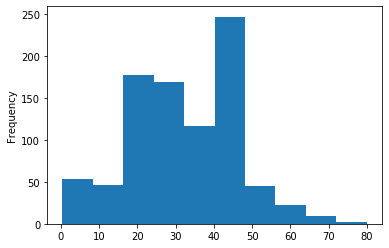

In [7]:
df['Age'].plot.hist()

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

In [9]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:

df["Embarked"].fillna(value='S',inplace=True)

In [11]:

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [13]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df["Sex"] = lab.fit_transform(df["Sex"])
df["Embarked"] = lab.fit_transform(df["Embarked"])

# Naive Bayes

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import * 
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
def prediction(col):
    
    clf = BernoulliNB()

    for i in col:
        x = df.drop([i], axis=1)
        print("--------------------------------------------------------------------------------------")
        print(f"Here Dependent Variable is {i} & remaining are Independent Variables")
        print("x :\n", x.head())
        y = df[i]
        print("\ny:\n", y.head())
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model = clf.fit(x_train,y_train)
        pred = model.predict(x_test)
    
        print(f"\nAcuuracy for {i} is: ", accuracy_score(y_test, pred, normalize=True))
        print(f"Confusion matrix for {i} is \n", confusion_matrix(y_test, pred))

column = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']        
prediction(column)

--------------------------------------------------------------------------------------
Here Dependent Variable is Survived & remaining are Independent Variables
x :
    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2

y:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Acuuracy for Survived is:  0.7715355805243446
Confusion matrix for Survived is 
 [[131  26]
 [ 35  75]]
--------------------------------------------------------------------------------------
Here Dependent Variable is Pclass & remaining are Independent Variables
x :
    Survived  Sex   Age  SibSp  Parch     Fare  Embarked
0         0    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2   

In [17]:
score = {'Dependent Variable': ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked'],
         'Accuracy Score': [0.7835,0.5932,0.7835,0.6791,0.7425,0.6977],
         'Total ':[268,268,268,268,268,268],
         'Correct Prediction':[210,159,210,182,199,187],
         'Incorrect Prediction':[58,109,58,86,69,81]}
score = pd.DataFrame(score)
score

,Dependent Variable,Accuracy Score,Total,Correct Prediction,Incorrect Prediction
0,Survived,0.7835,268,210,58
1,Pclass,0.5932,268,159,109
2,Sex,0.7835,268,210,58
3,SibSp,0.6791,268,182,86
4,Parch,0.7425,268,199,69
5,Embarked,0.6977,268,187,81
